# ADVERTISING  DATASET
Using the above dataset to build a Model using Logistic Regression model to predict whether the person will click on the advertisement or not. 

## BUSINESS OBJECTIVE
* Maximize Revenue
* Maximize Profit
* Maximize Advertisement clicks.
* Minimize churn rate. 

## CONSTRAINTS
* Human Behaviour
* Advertisement Placement. 

## DATA DICTIONARY

| **slno** |      **Name of Feature**     | **Description**                                                          | **Type** | **Relevance** |
|:--------:|:----------------------------|:--------------------------------------------------------------------------|:--------:|:-------------:|
| 1 | Daily_Time_Spent_on_site   | Consumer time on site in minutes                     | Ratio    | Relevant      |
| 2 | Age                        | Age of the User                                      | Ratio    | Relevant      |
| 3 | Area_Income                | Average Income of the area in which the user resides | Ratio    | Relevant      |
| 4 | Daily Internet Usage       | Daily Internet usage of the user                     | Ratio    | Relevant      |
| 5 | Ad_Topic_Line              | Headline of the advertisement                        | Nominal    | Relevant      |
| 6 | City                       | City of consumer                                     | Nominal    | Relevant      |
| 7 | Male                       | Whether or not consumer was male                     | Binary    | Relevant      |
| 8 | Country                    | Country of consumer                                  | Nominal    | Relevant      |
| 9 | Timestamp                  | Time at which consumer clicked on Ad or closed window| Interval    | Relevant      |
| 10 | Clicked_on_Ad             | 0 or 1 indicated clicking on Ad                      | Binary    | Relevant      |


Importing the required libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
from sklearn.model_selection import train_test_split

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [3]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass23\advertising.csv")
df=df0.copy()
df.head()

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Ad_Topic_Line,City,Male,Country,Timestamp,Clicked_on_Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/04/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,3/06/2016 3:36,0


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(1000, 10)

In [4]:
df.dtypes

Daily_Time_ Spent _on_Site    float64
Age                             int64
Area_Income                   float64
Daily Internet Usage          float64
Ad_Topic_Line                  object
City                           object
Male                            int64
Country                        object
Timestamp                      object
Clicked_on_Ad                   int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Daily_Time_ Spent _on_Site  1000 non-null   float64
 1   Age                         1000 non-null   int64  
 2   Area_Income                 1000 non-null   float64
 3   Daily Internet Usage        1000 non-null   float64
 4   Ad_Topic_Line               1000 non-null   object 
 5   City                        1000 non-null   object 
 6   Male                        1000 non-null   int64  
 7   Country                     1000 non-null   object 
 8   Timestamp                   1000 non-null   object 
 9   Clicked_on_Ad               1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Male,Clicked_on_Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number and Percentage of Missing Values in the Dataset.

In [8]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 Daily_Time_ Spent _on_Site    0
Age                           0
Area_Income                   0
Daily Internet Usage          0
Ad_Topic_Line                 0
City                          0
Male                          0
Country                       0
Timestamp                     0
Clicked_on_Ad                 0
dtype: int64


The timestamp column cannot be analysed in this format so splitting that column into four more columns and dropping the original column

In [9]:
df[["day", "month", "yeart"]] = df["Timestamp"].str.split("/", expand = True)
df[["year","time"]] = df["yeart"].str.split(" ", expand = True)
df.drop(['Timestamp','yeart'],axis=1,inplace=True)
df.head()

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Ad_Topic_Line,City,Male,Country,Clicked_on_Ad,day,month,year,time
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,27,03,2016,0:53
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,04,2016,1:39
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,13,03,2016,20:35
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,10,01,2016,2:31
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,3,06,2016,3:36


Using the newly created time variable to create a column day which has values of '0' or '1' where '1'= day and '0'= night. So first creating a different dataframe which has only the time column. And setting the index as a datetime index so as to create a new column which helps to understand whether the event took place in day or night. 

In [10]:
df1=df.drop(['Daily_Time_ Spent _on_Site', 'Age', 'Area_Income','Daily Internet Usage', 'Ad_Topic_Line', 'City', 'Male', 'Country','Clicked_on_Ad', 'day', 'month', 'year'],axis=1)
df1 = df1.set_index(pd.to_datetime(df1["time"]))
df1.head()

,time
time,
2022-11-21 00:53:00,0:53
2022-11-21 01:39:00,1:39
2022-11-21 20:35:00,20:35
2022-11-21 02:31:00,2:31
2022-11-21 03:36:00,3:36


Creating a new column called day in the new dataframe with all the values as zero which signifies as night and setting a condition which says that any time between 6am and 6pm will be day and everything else will be night. 

In [11]:
df1["Day_Night"] = np.zeros(1000)
df1.loc[df1.between_time("06:00", "18:00").index, "Day_Night"] = 1
df1.head()

,time,Day_Night
time,,
2022-11-21 00:53:00,0:53,0.0
2022-11-21 01:39:00,1:39,0.0
2022-11-21 20:35:00,20:35,0.0
2022-11-21 02:31:00,2:31,0.0
2022-11-21 03:36:00,3:36,0.0


Now again reseting the index back to the original integer values starting with zero and dropping the column which gets added to the dataframe on reseting the index. 

In [12]:
df1.rename(columns = {'time':'Time'}, inplace = True)
df1.reset_index(inplace=True)
df1.drop(['time'],axis=1,inplace=True)
df1.head()

,Time,Day_Night
0,0:53,0.0
1,1:39,0.0
2,20:35,0.0
3,2:31,0.0
4,3:36,0.0


Now joining back the day variable to the original dataframe and dropping the time column which won't be that useful for the analysis. 

In [13]:
df=df.join(df1['Day_Night'])
df.drop(['time'],axis=1,inplace=True)
df.head()

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Ad_Topic_Line,City,Male,Country,Clicked_on_Ad,day,month,year,Day_Night
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,27,03,2016,0.0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,04,2016,0.0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,13,03,2016,0.0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,10,01,2016,0.0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,3,06,2016,0.0


Checking the number of unique values of each variable.

In [14]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 Daily_Time_ Spent _on_Site     900
Age                             43
Area_Income                   1000
Daily Internet Usage           966
Ad_Topic_Line                 1000
City                           969
Male                             2
Country                        237
Clicked_on_Ad                    2
day                             31
month                            7
year                             1
Day_Night                        2
dtype: int64


Dropping some of the irrelevant columns which will not useful for analyis. 

In [15]:
df.drop(['Ad_Topic_Line','City','year'],axis=1,inplace=True)
df.head()

,Daily_Time_ Spent _on_Site,Age,Area_Income,Daily Internet Usage,Male,Country,Clicked_on_Ad,day,month,Day_Night
0,68.95,35,61833.90,256.09,0,Tunisia,0,27,03,0.0
1,80.23,31,68441.85,193.77,1,Nauru,0,4,04,0.0
2,69.47,26,59785.94,236.50,0,San Marino,0,13,03,0.0
3,74.15,29,54806.18,245.89,1,Italy,0,10,01,0.0
4,68.37,35,73889.99,225.58,0,Iceland,0,3,06,0.0


In [43]:
df.rename(columns = {'Daily Internet Usage':'DIU','Daily_Time_ Spent _on_Site':'DTSS'}, inplace = True)

Rearranging the columns.

In [50]:
df=df.loc[:,['Clicked_on_Ad','DTSS', 'Age', 'Area_Income', 'DIU', 'Male', 'Country','day', 'month', 'Day_Night']]
df.head()

,Clicked_on_Ad,DTSS,Age,Area_Income,DIU,Male,Country,day,month,Day_Night
0,0,68.95,35,61833.90,256.09,0,Tunisia,27,03,0.0
1,0,80.23,31,68441.85,193.77,1,Nauru,4,04,0.0
2,0,69.47,26,59785.94,236.50,0,San Marino,13,03,0.0
3,0,74.15,29,54806.18,245.89,1,Italy,10,01,0.0
4,0,68.37,35,73889.99,225.58,0,Iceland,3,06,0.0


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [16]:
df.mean()

C:\Users\lenny\AppData\Local\Temp\ipykernel_25128\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Daily_Time_ Spent _on_Site       65.00020
Age                              36.00900
Area_Income                   55000.00008
Daily Internet Usage            180.00010
Male                              0.48100
Clicked_on_Ad                     0.50000
day                                   inf
month                                 inf
Day_Night                         0.49500
dtype: float64

In [17]:
df.median()

C:\Users\lenny\AppData\Local\Temp\ipykernel_25128\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Daily_Time_ Spent _on_Site       68.215
Age                              35.000
Area_Income                   57012.300
Daily Internet Usage            183.130
Male                              0.000
Clicked_on_Ad                     0.500
day                              15.000
month                             4.000
Day_Night                         0.000
dtype: float64

In [18]:
stats.mode(df)

C:\Users\lenny\AppData\Local\Temp\ipykernel_25128\4235401754.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df)
C:\Users\lenny\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\lenny\AppData\Local\Temp\ipykernel_25128\4235401754.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/r

ModeResult(mode=array([[62.26, 31, 61833.9, 167.22, 0, 'Czech Republic', 0, '3', '02',
        0.0]], dtype=object), count=array([[  3,  60,   1,   2, 519,   9, 500,  46, 160, 505]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [19]:
df.var()

C:\Users\lenny\AppData\Local\Temp\ipykernel_25128\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Daily_Time_ Spent _on_Site    2.513371e+02
Age                           7.718611e+01
Area_Income                   1.799524e+08
Daily Internet Usage          1.927415e+03
Male                          2.498889e-01
Clicked_on_Ad                 2.502503e-01
Day_Night                     2.502252e-01
dtype: float64

In [20]:
df.std()

C:\Users\lenny\AppData\Local\Temp\ipykernel_25128\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Daily_Time_ Spent _on_Site       15.853615
Age                               8.785562
Area_Income                   13414.634022
Daily Internet Usage             43.902339
Male                              0.499889
Clicked_on_Ad                     0.500250
Day_Night                         0.500225
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [21]:
df.skew()

C:\Users\lenny\AppData\Local\Temp\ipykernel_25128\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Daily_Time_ Spent _on_Site   -0.371760
Age                           0.479142
Area_Income                  -0.650373
Daily Internet Usage         -0.033537
Male                          0.076169
Clicked_on_Ad                 0.000000
day                           0.043947
month                         0.090786
Day_Night                     0.020031
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [22]:
df.kurt()

C:\Users\lenny\AppData\Local\Temp\ipykernel_25128\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Daily_Time_ Spent _on_Site   -1.095534
Age                          -0.400524
Area_Income                  -0.099810
Daily Internet Usage         -1.272659
Male                         -1.998199
Clicked_on_Ad                -2.004012
day                          -1.166409
month                        -1.186724
Day_Night                    -2.003610
dtype: float64

### GRAPHICAL REPRESENTATION

Using the countplots and distribution plots to understand the different variables as all the variables are binary, so using scatterplots and boxplots is not an option. 

In [23]:
df.columns

Index(['Daily_Time_ Spent _on_Site', 'Age', 'Area_Income',
       'Daily Internet Usage', 'Male', 'Country', 'Clicked_on_Ad', 'day',
       'month', 'Day_Night'],
      dtype='object')

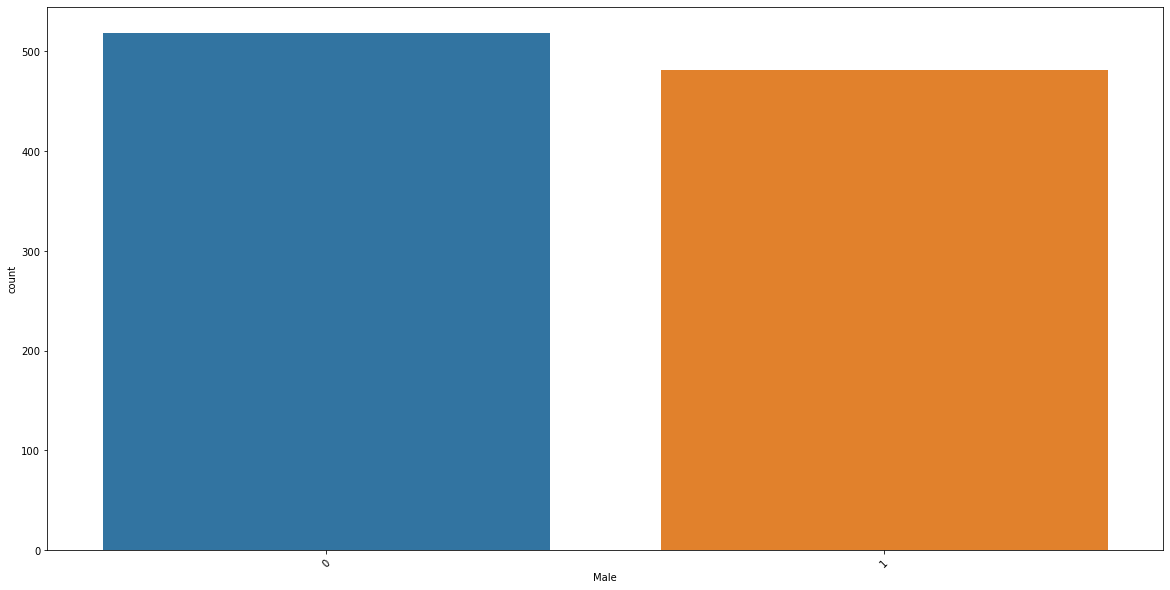

In [24]:
plt.figure(1, figsize=(20, 10))
sns.countplot(x=df["Male"])
plt.xticks(rotation = 45)
plt.show()

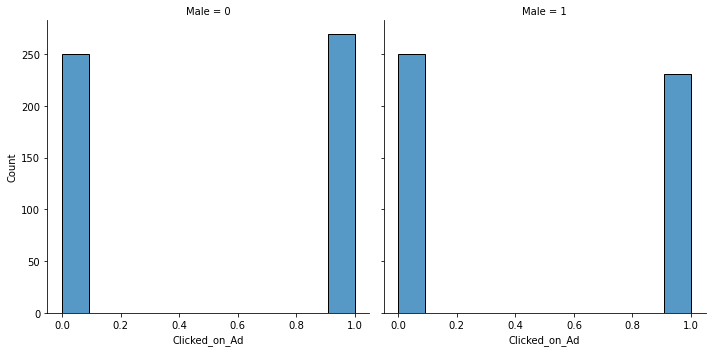

In [25]:
sns.displot(df, x="Clicked_on_Ad", col="Male")

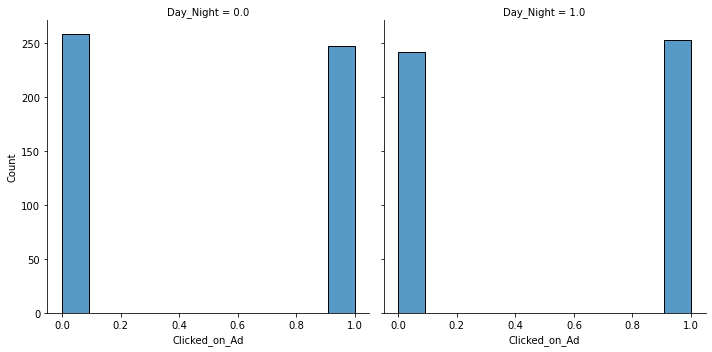

In [26]:
sns.displot(df, x="Clicked_on_Ad", col="Day_Night")

In [23]:
df.columns

Index(['kids', 'vryunhap', 'unhap', 'avgmarr', 'hapavg', 'vryhap', 'antirel',
       'notrel', 'slghtrel', 'smerel', 'vryrel', 'yrsmarr1', 'yrsmarr2',
       'yrsmarr3', 'yrsmarr4', 'yrsmarr5', 'yrsmarr6', 'affairsyn'],
      dtype='object')

From the pairplot we can observe all the scatter plots and histograms of the numerical variables of the dataset.

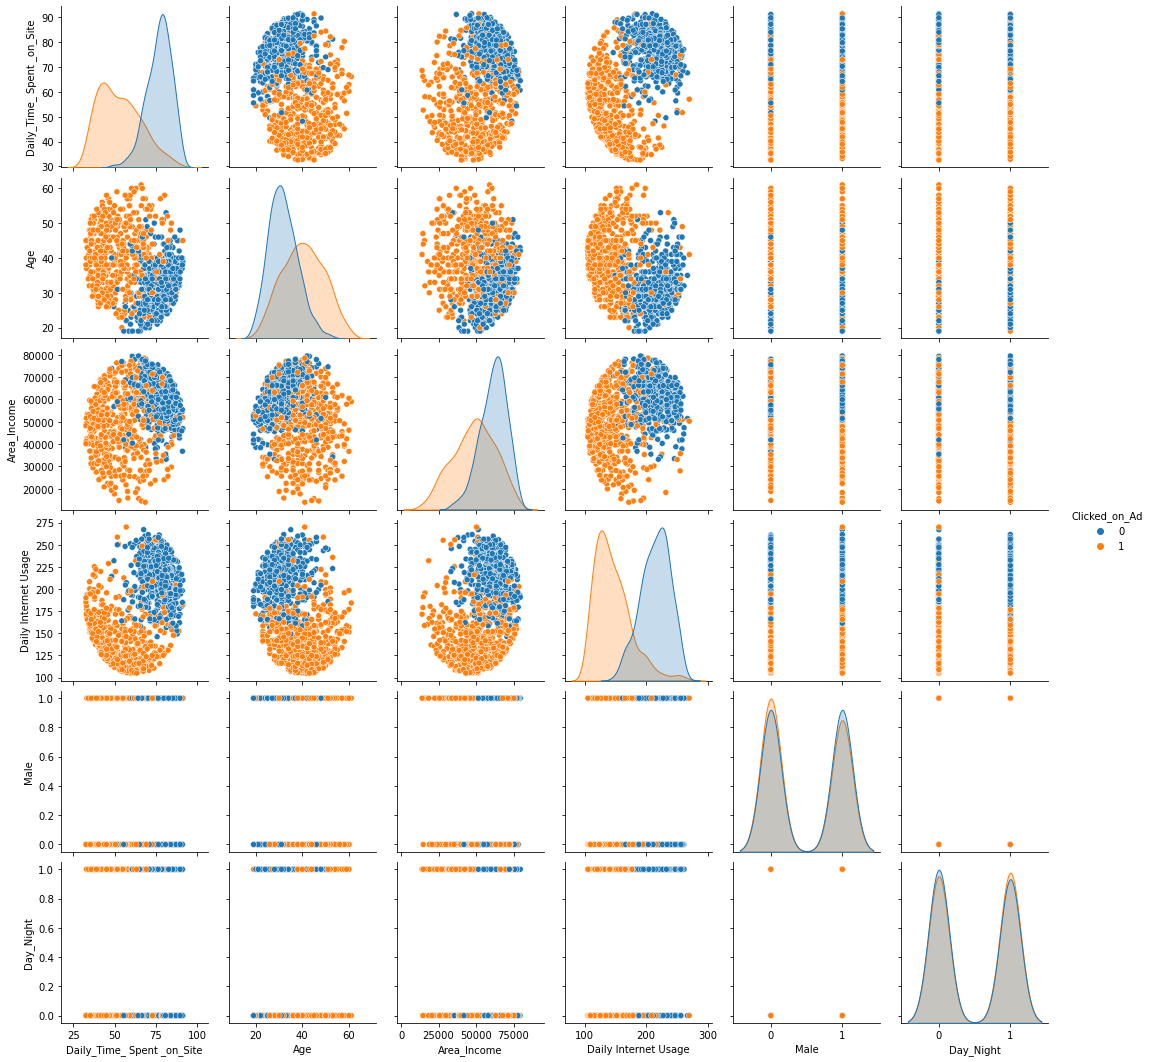

In [27]:
sns.pairplot(df.iloc[:, :],hue='Clicked_on_Ad')

Plotting the boxplots of each variable. 

In [29]:
df.columns

Index(['Daily_Time_ Spent _on_Site', 'Age', 'Area_Income',
       'Daily Internet Usage', 'Ad_Topic_Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked_on_Ad'],
      dtype='object')

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Daily_Time_ Spent _on_Site'>

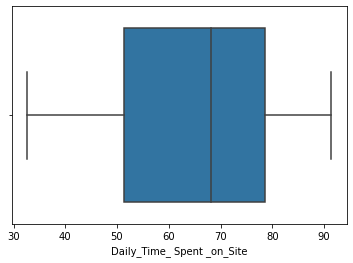

In [28]:
sns.boxplot(df["DTSS"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

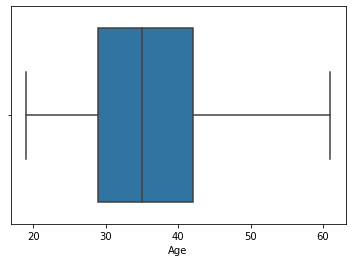

In [29]:
sns.boxplot(df["Age"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area_Income'>

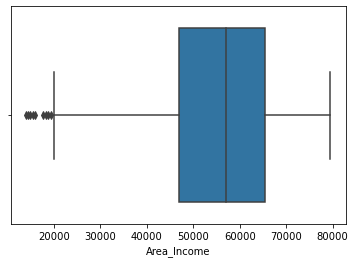

In [30]:
sns.boxplot(df["Area_Income"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Daily Internet Usage'>

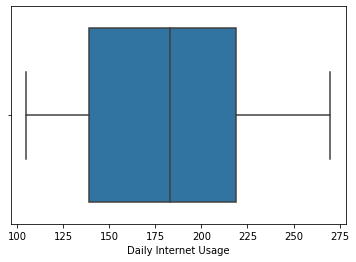

In [31]:
sns.boxplot(df["DIU"])

As there are some outliers in the area income column using the below custom code to get the number of outliers followed by rectifying them using winsorization. 

In [32]:
#Defining a custom function to get the number of outliers present as doing the steps again would just add extra lines 
def outlier_func(i):
    x=i.quantile(0.25)-((i.quantile(0.75)-i.quantile(0.25))*1.5)
    y=i.quantile(0.75)+((i.quantile(0.75)-i.quantile(0.25))*1.5)
    outliers= np.where(i > y, True, np.where(i < x, True, False))
    return(outliers)

In [33]:
sum(outlier_func(df["Area_Income"]))

9

In [34]:
from feature_engine.outliers import Winsorizer

In [35]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['Area_Income'])

df['Area_Income']= winsor.fit_transform(df[['Area_Income']])
sum(outlier_func(df['Area_Income']))

0

__CORRELATION CHART__

<AxesSubplot:>

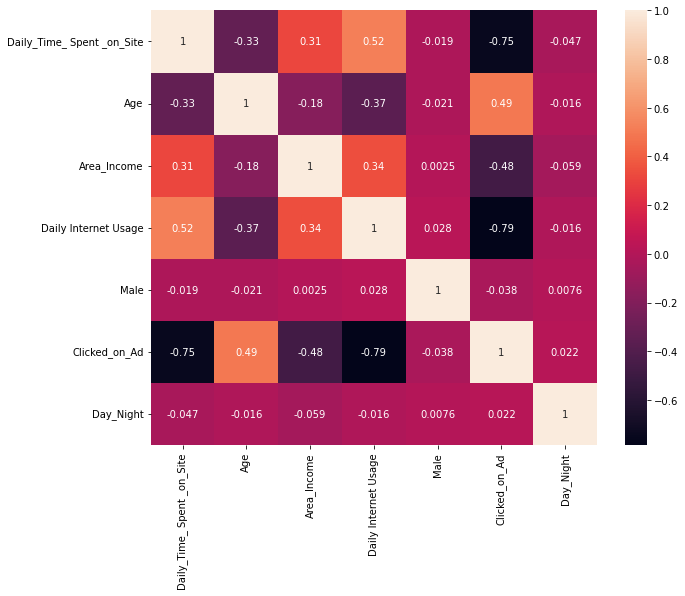

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

from the correlation chart we can see that daily time spent on  site and daily internet usage  have a comparatively strong correlation with the output variable. 

#### MODEL BUILDING

Importing the library required for building the model. 

In [37]:
import statsmodels.formula.api as smf

__Logistic Regression__

Fitting the model

In [45]:
logit_model = smf.logit('Clicked_on_Ad ~ DTSS + Age + Area_Income + DIU + Male  + day + month + Day_Night ', data = df).fit()

Optimization terminated successfully.
         Current function value: 0.064902
         Iterations 11


For getting the value of AIC we use the summary2

In [46]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.906      
Dependent Variable: Clicked_on_Ad    AIC:              215.8049   
Date:               2022-11-21 00:48 BIC:              426.8383   
No. Observations:   1000             Log-Likelihood:   -64.902    
Df Model:           42               LL-Null:          -693.15    
Df Residuals:       957              LLR p-value:      5.5879e-236
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     11.0000                                       
-------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025    0.975]
-------------------------------------------------------------------
Intercept     42.6141    5.6898   7.4896  0.0000   31.4623  53.7659
day[T.10]     -1.8117    1.7946  -1.0095  0.3127   -5.3291   1.7057
day[T.11]     -0.0503    1.6954  -0.0297  0.9763   -3.3731   3.2726
day[T.12]      1.6909    1.6635   1.0164  0.3094   -1.5696   4.9514
day[T.13]     -2.8506    2.8600  -0.9967  0.3189   -8.4562   2.7549
day[T.14]      0.3795    1.8898   0.2008  0.8409   -3.3246   4.0835
day[T.15]     -2.7432    1.9677  -1.3941  0.1633   -6.5998   1.1134
day[T.16]     -5.3347    4.2008  -1.2699  0.2041  -13.5681   2.8987
day[T.17]     -1.8753    1.8257  -1.0272  0.3043   -5.4537   1.7031
day[T.18]     -3.4915    2.0894  -1.6711  0.0947   -7.5866   0.6036
day[T.19]     -3.0983    1.9546  -1.5851  0.1129   -6.9291   0.7326
day[T.2]      -3.7553    2.2213  -1.6906  0.0909   -8.1090   0.5983
day[T.20]     -5.8486    2.1456  -2.7258  0.0064  -10.0539  -1.6432
day[T.21]      0.1428    1.7017   0.0839  0.9331   -3.1925   3.4781
day[T.22]     -3.6576    2.0013  -1.8277  0.0676   -7.5801   0.2648
day[T.23]     -2.9472    1.9289  -1.5279  0.1265   -6.7278   0.8334
day[T.24]     -5.1114    2.1870  -2.3372  0.0194   -9.3978  -0.8250
day[T.25]     -1.5118    1.8989  -0.7962  0.4259   -5.2335   2.2099
day[T.26]     -1.4361    1.7066  -0.8415  0.4001   -4.7809   1.9088
day[T.27]     -6.1110    4.9661  -1.2305  0.2185  -15.8444   3.6225
day[T.28]     -2.8234    2.7435  -1.0291  0.3034   -8.2006   2.5538
day[T.29]     -0.6113    1.7663  -0.3461  0.7293   -4.0733   2.8506
day[T.3]      -1.2521    1.6253  -0.7704  0.4411   -4.4376   1.9335
day[T.30]     -1.9207    2.5397  -0.7563  0.4495   -6.8984   3.0570
day[T.31]      0.8831    1.8021   0.4900  0.6241   -2.6490   4.4152
day[T.4]      -0.5313    2.0096  -0.2644  0.7915   -4.4700   3.4074
day[T.5]      -5.9378    4.1580  -1.4280  0.1533  -14.0874   2.2118
day[T.6]      -0.8083    1.9049  -0.4243  0.6713   -4.5419   2.9253
day[T.7]      -4.9833    1.8845  -2.6444  0.0082   -8.6769  -1.2898
day[T.8]      -0.9353    1.8413  -0.5079  0.6115   -4.5441   2.6736
day[T.9]      -0.3893    1.6104  -0.2417  0.8090   -3.5456   2.7670
month[T.02]   -0.5507    0.8870  -0.6209  0.5347   -2.2892   1.1878
month[T.03]   -1.6342    1.0167  -1.6074  0.1080   -3.6269   0.3585
month[T.04]   -0.1320    0.9546  -0.1382  0.8901   -2.0030   1.7391
month[T.05]    0.2894    0.9525   0.3038  0.7613   -1.5775   2.1562
month[T.06]   -1.0576    1.0483  -1.0088  0.3131   -3.1123   0.9971
month[T.07]    0.0147    1.0645   0.0138  0.9890   -2.0716   2.1010
DTSS          -0.2819    0.0368  -7.6623  0.0000   -0.3540  -0.2098
Age            0.2319    0.0383   6.0563  0.0000    0.1568   0.3069
Area_Income   -0.0002    0.0000  -6.3092  0.0000   -0.0003  -0.0001
DIU           -0.0887    0.0120  -7.4100  0.0000   -0.1121  -0.0652
Male          -0.2497    0.5428  -0.4601  0.6454   -1.3136   0.8142
Day_Night      0.0088    0.5372   0.0164  0.9869   -1.0441   1.0616
==================================================================

"""

In [47]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Clicked_on_Ad   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      957
Method:                           MLE   Df Model:                           42
Date:                Mon, 21 Nov 2022   Pseudo R-squ.:                  0.9064
Time:                        00:49:30   Log-Likelihood:                -64.902
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                5.588e-236
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      42.6141      5.690      7.490      0.000      31.462      53.766
day[T.10]      -1.8117      1.795     -1.010      0.313      -5.329       1.706
day[T.11]      -0.0503      1.695     -0.030      0.976      -3.373       3.273
day[T.12]       1.6909      1.664      1.016      0.309      -1.570       4.951
day[T.13]      -2.8506      2.860     -0.997      0.319      -8.456       2.755
day[T.14]       0.3795      1.890      0.201      0.841      -3.325       4.084
day[T.15]      -2.7432      1.968     -1.394      0.163      -6.600       1.113
day[T.16]      -5.3347      4.201     -1.270      0.204     -13.568       2.899
day[T.17]      -1.8753      1.826     -1.027      0.304      -5.454       1.703
day[T.18]      -3.4915      2.089     -1.671      0.095      -7.587       0.604
day[T.19]      -3.0983      1.955     -1.585      0.113      -6.929       0.733
day[T.2]       -3.7553      2.221     -1.691      0.091      -8.109       0.598
day[T.20]      -5.8486      2.146     -2.726      0.006     -10.054      -1.643
day[T.21]       0.1428      1.702      0.084      0.933      -3.193       3.478
day[T.22]      -3.6576      2.001     -1.828      0.068      -7.580       0.265
day[T.23]      -2.9472      1.929     -1.528      0.127      -6.728       0.833
day[T.24]      -5.1114      2.187     -2.337      0.019      -9.398      -0.825
day[T.25]      -1.5118      1.899     -0.796      0.426      -5.233       2.210
day[T.26]      -1.4361      1.707     -0.841      0.400      -4.781       1.909
day[T.27]      -6.1110      4.966     -1.231      0.218     -15.844       3.622
day[T.28]      -2.8234      2.744     -1.029      0.303      -8.201       2.554
day[T.29]      -0.6113      1.766     -0.346      0.729      -4.073       2.851
day[T.3]       -1.2521      1.625     -0.770      0.441      -4.438       1.933
day[T.30]      -1.9207      2.540     -0.756      0.449      -6.898       3.057
day[T.31]       0.8831      1.802      0.490      0.624      -2.649       4.415
day[T.4]       -0.5313      2.010     -0.264      0.791      -4.470       3.407
day[T.5]       -5.9378      4.158     -1.428      0.153     -14.087       2.212
day[T.6]       -0.8083      1.905     -0.424      0.671      -4.542       2.925
day[T.7]       -4.9833      1.885     -2.644      0.008      -8.677      -1.290
day[T.8]       -0.9353      1.841     -0.508      0.611      -4.544       2.674
day[T.9]       -0.3893      1.610     -0.242      0.809      -3.546       2.767
month[T.02]    -0.5507      0.887     -0.621      0.535      -2.289       1.188
month[T.03]    -1.6342      1.017     -1.607      0.108      -3.627       0.358
month[T.04]    -0.1320      0.955     -0.138      0.890      -2.003       1.739
month[T.05]     0.2894      0.952      0.304      0.761      -1.577       2.156
month[T.06]    -1.0576      1.048     -1.009      0.313      -3.112       0.997
month[T.07]     0.0147      1.064      0.014      0.989      -2.072       2.101
DTSS           -0.2819      0.037     -7.

From the summary we can see that the probability have very high values but since the variables are binary we can ignore the probabilities. from summary2 we consider the AIC value which we can use to compare the models and decide which is better. 

Loading the libraries required for getting the accuracy scores of the model. 

In [48]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

Predicting the values using the model. 

In [51]:
pred = logit_model.predict(df.iloc[ :, 1: ])

From the sklearn library using roc_curve to find the fpr, tpr and thresholds to find the optimal threshold. 

In [52]:
df.columns

Index(['Clicked_on_Ad', 'DTSS', 'Age', 'Area_Income', 'DIU', 'Male', 'Country',
       'day', 'month', 'Day_Night'],
      dtype='object')

In [53]:
# from sklearn import metrics
fpr, tpr, thresholds = roc_curve(df.Clicked_on_Ad, pred)
# Using the argmax to find the index which has the highest difference between the True Positive Rate and False Positive Rate. 
optimal_idx = np.argmax(tpr - fpr)
# Identifying the optimal threshold and saving it using the index value. 
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5908257225976858

Importing the library required to create the ROC curve. 

In [54]:
import pylab as pl

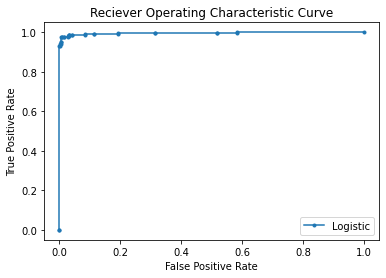

In [55]:
pl.plot(fpr,tpr, marker='.', label='Logistic');pl.xlabel('False Positive Rate');pl.ylabel('True Positive Rate');pl.title('Reciever Operating Characteristic Curve')
pl.legend()
pl.show()

Using the auc function to get the Area under the ROC Curve. 

In [56]:
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.995828


Getting the classification report after setting the optimal threshold value as the cutoff value and converting the predicted probabilities into the binary output. 

In [57]:
# filling all the cells with zeroes
df["pred"] = np.zeros(1000)
# taking threshold value and above the prob value will be treated as correct value 
df.loc[pred > optimal_threshold, "pred"] = 1
# classification report
print(classification_report(y_pred=df["pred"], y_true=df["Clicked_on_Ad"]))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       500
           1       0.99      0.97      0.98       500

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



Saving the classification report in a dataframe.

In [59]:
classification_report = pd.DataFrame(classification_report(y_pred =df["pred"], y_true =df["Clicked_on_Ad"], output_dict=True)).transpose()
classification_report

,precision,recall,f1-score,support
0,0.972603,0.994,0.983185,500.000
1,0.993865,0.972,0.982811,500.000
accuracy,0.983000,0.983,0.983000,0.983
macro avg,0.983234,0.983,0.982998,1000.000
weighted avg,0.983234,0.983,0.982998,1000.000


Using the train test split function to split the data into train and test dataset. 

In [60]:
df_train, df_test = train_test_split(df, test_size = 0.3,random_state=1000) # 30% test data

Fitting the model on the training data. 

In [61]:
model = smf.logit('Clicked_on_Ad ~ DTSS + Age + Area_Income + DIU + Male  + day + month + Day_Night ', data = df_train).fit()

Optimization terminated successfully.
         Current function value: 0.053532
         Iterations 12


In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Clicked_on_Ad   No. Observations:                  700
Model:                          Logit   Df Residuals:                      657
Method:                           MLE   Df Model:                           42
Date:                Mon, 21 Nov 2022   Pseudo R-squ.:                  0.9228
Time:                        01:21:22   Log-Likelihood:                -37.473
converged:                       True   LL-Null:                       -485.13
Covariance Type:            nonrobust   LLR p-value:                1.725e-160
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      41.2449     12.612      3.270      0.001      16.526      65.964
day[T.10]       1.0823     10.451      0.104      0.918     -19.402      21.566
day[T.11]       3.0651     10.397      0.295      0.768     -17.313      23.443
day[T.12]       6.2638     10.470      0.598      0.550     -14.256      26.784
day[T.13]       1.1915     10.709      0.111      0.911     -19.798      22.181
day[T.14]       2.1057     10.882      0.194      0.847     -19.223      23.434
day[T.15]       1.8833     10.466      0.180      0.857     -18.629      22.396
day[T.16]      -1.0082     11.083     -0.091      0.928     -22.730      20.714
day[T.17]       3.5086     10.428      0.336      0.737     -16.930      23.947
day[T.18]       3.9992     10.857      0.368      0.713     -17.281      25.279
day[T.19]       1.4038     10.371      0.135      0.892     -18.922      21.730
day[T.2]        1.1109     10.704      0.104      0.917     -19.868      22.090
day[T.20]       2.1894     11.542      0.190      0.850     -20.432      24.811
day[T.21]       2.1200     10.485      0.202      0.840     -18.430      22.670
day[T.22]       1.6533     10.379      0.159      0.873     -18.690      21.996
day[T.23]       2.1257     10.537      0.202      0.840     -18.526      22.778
day[T.24]       0.4159     10.456      0.040      0.968     -20.078      20.910
day[T.25]      -0.3832     12.086     -0.032      0.975     -24.072      23.306
day[T.26]       4.9462     10.372      0.477      0.633     -15.382      25.274
day[T.27]      -2.7519     12.981     -0.212      0.832     -28.194      22.690
day[T.28]       1.0881     10.974      0.099      0.921     -20.421      22.597
day[T.29]       3.9151     10.394      0.377      0.706     -16.457      24.287
day[T.3]        3.7932     10.377      0.366      0.715     -16.546      24.132
day[T.30]       3.4726     10.491      0.331      0.741     -17.090      24.035
day[T.31]       5.1780     10.411      0.497      0.619     -15.228      25.584
day[T.4]        1.4965     11.491      0.130      0.896     -21.025      24.018
day[T.5]       -1.9390     11.659     -0.166      0.868     -24.790      20.912
day[T.6]        4.8294     10.462      0.462      0.644     -15.675      25.334
day[T.7]       -0.5560     10.494     -0.053      0.958     -21.124      20.012
day[T.8]        4.3872     10.419      0.421      0.674     -16.034      24.809
day[T.9]        3.2730     10.372      0.316      0.752     -17.055      23.601
month[T.02]    -0.2725      1.506     -0.181      0.856      -3.224       2.679
month[T.03]    -1.2663      1.615     -0.784      0.433      -4.432       1.900
month[T.04]     0.5632      1.481      0.380      0.704      -2.340       3.466
month[T.05]     2.3008      1.571      1.464      0.143      -0.779       5.381
month[T.06]     0.5759      1.661      0.347      0.729      -2.680       3.831
month[T.07]     1.5143      1.625      0.932      0.351      -1.671       4.699
DTSS           -0.3093      0.055     -5.

In [63]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.923      
Dependent Variable: Clicked_on_Ad    AIC:              160.9453   
Date:               2022-11-21 01:21 BIC:              356.6418   
No. Observations:   700              Log-Likelihood:   -37.473    
Df Model:           42               LL-Null:          -485.13    
Df Residuals:       657              LLR p-value:      1.7251e-160
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     12.0000                                       
-------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025    0.975]
-------------------------------------------------------------------
Intercept     41.2449   12.6121   3.2703  0.0011   16.5256  65.9643
day[T.10]      1.0823   10.4512   0.1036  0.9175  -19.4017  21.5664
day[T.11]      3.0651   10.3970   0.2948  0.7681  -17.3126  23.4428
day[T.12]      6.2638   10.4697   0.5983  0.5497  -14.2565  26.7841
day[T.13]      1.1915   10.7090   0.1113  0.9114  -19.7978  22.1809
day[T.14]      2.1057   10.8821   0.1935  0.8466  -19.2229  23.4343
day[T.15]      1.8833   10.4659   0.1799  0.8572  -18.6294  22.3961
day[T.16]     -1.0082   11.0827  -0.0910  0.9275  -22.7300  20.7135
day[T.17]      3.5086   10.4280   0.3365  0.7365  -16.9299  23.9471
day[T.18]      3.9992   10.8574   0.3683  0.7126  -17.2810  25.2794
day[T.19]      1.4038   10.3705   0.1354  0.8923  -18.9220  21.7297
day[T.2]       1.1109   10.7036   0.1038  0.9173  -19.8678  22.0895
day[T.20]      2.1894   11.5419   0.1897  0.8495  -20.4322  24.8111
day[T.21]      2.1200   10.4849   0.2022  0.8398  -18.4300  22.6700
day[T.22]      1.6533   10.3793   0.1593  0.8734  -18.6897  21.9963
day[T.23]      2.1257   10.5369   0.2017  0.8401  -18.5262  22.7776
day[T.24]      0.4159   10.4563   0.0398  0.9683  -20.0781  20.9099
day[T.25]     -0.3832   12.0864  -0.0317  0.9747  -24.0720  23.3056
day[T.26]      4.9462   10.3716   0.4769  0.6334  -15.3818  25.2741
day[T.27]     -2.7519   12.9809  -0.2120  0.8321  -28.1940  22.6901
day[T.28]      1.0881   10.9743   0.0992  0.9210  -20.4211  22.5974
day[T.29]      3.9151   10.3942   0.3767  0.7064  -16.4572  24.2875
day[T.3]       3.7932   10.3772   0.3655  0.7147  -16.5457  24.1321
day[T.30]      3.4726   10.4911   0.3310  0.7406  -17.0895  24.0348
day[T.31]      5.1780   10.4113   0.4973  0.6189  -15.2277  25.5837
day[T.4]       1.4965   11.4908   0.1302  0.8964  -21.0251  24.0181
day[T.5]      -1.9390   11.6590  -0.1663  0.8679  -24.7903  20.9122
day[T.6]       4.8294   10.4615   0.4616  0.6443  -15.6747  25.3336
day[T.7]      -0.5560   10.4939  -0.0530  0.9577  -21.1238  20.0117
day[T.8]       4.3872   10.4194   0.4211  0.6737  -16.0344  24.8088
day[T.9]       3.2730   10.3718   0.3156  0.7523  -17.0553  23.6012
month[T.02]   -0.2725    1.5057  -0.1810  0.8564   -3.2236   2.6786
month[T.03]   -1.2663    1.6154  -0.7839  0.4331   -4.4324   1.8997
month[T.04]    0.5632    1.4812   0.3802  0.7038   -2.3400   3.4664
month[T.05]    2.3008    1.5713   1.4643  0.1431   -0.7788   5.3805
month[T.06]    0.5759    1.6611   0.3467  0.7288   -2.6798   3.8315
month[T.07]    1.5143    1.6250   0.9319  0.3514   -1.6706   4.6992
DTSS          -0.3093    0.0547  -5.6518  0.0000   -0.4166  -0.2020
Age            0.2410    0.0512   4.7086  0.0000    0.1407   0.3413
Area_Income   -0.0002    0.0000  -4.4874  0.0000   -0.0003  -0.0001
DIU           -0.1017    0.0190  -5.3605  0.0000   -0.1389  -0.0645
Male          -1.0228    0.7724  -1.3243  0.1854   -2.5367   0.4910
Day_Night      1.5618    0.8919   1.7511  0.0799   -0.1863   3.3098
==================================================================

"""

From the summary we can see that the AIC value is lower while fitting the model on the train data. Predicting the probabilities on the test data

In [68]:
test_pred=model.predict(df_test)

In [69]:
# Creating new column for storing predicted data after binarisation. 
# filling all the cells with zeroes
df_test["test_pred"] = np.zeros(300)

In [70]:
# taking threshold value as 'optimal_threshold' and above the thresold prob value will be treated as 1 
df_test.loc[test_pred > optimal_threshold, "test_pred"] = 1

Using the crosstab function from the pandas library to create the Confusion Matrix. 

In [71]:
confusion_matrix = pd.crosstab(df_test['test_pred'], df_test['Clicked_on_Ad'],rownames = ['Predictions'], colnames= ['Actuals'])
confusion_matrix

Actuals,0,1
Predictions,,
0.0,152,12
1.0,3,133


Calculating the acuracy of the test data by adding the correctly predicted records and dividing it by the total number of records. 

In [72]:
accuracy_test = (152 + 133)/(300) 
accuracy_test

0.95

Following the same steps to calculate the accuracy of the train data. 

In [73]:
train_pred=model.predict(df_train)

In [74]:
df_train["train_pred"]=np.zeros(700)

In [75]:
df_train.loc[train_pred>optimal_threshold,'train_pred']=1

In [76]:
confusion_matrix = pd.crosstab(df_train['train_pred'], df_train['Clicked_on_Ad'],rownames = ['Predictions'], colnames= ['Actuals'])
confusion_matrix

Actuals,0,1
Predictions,,
0.0,341,9
1.0,4,346


In [77]:
accuracy_train = (341+ 346)/(700) 
accuracy_train

0.9814285714285714

### CONCLUSION

From the accuracies of both the test and train dataset we can see that they are perfect with very high accuracies. So the model is ideal to do prediction. 